In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# define constants
REBUILD_CLASS_ARRAYS = False
REBUILD_DATA_ARRAY = True
BALANCE_DATA = True
FIRE = "../../data/positive/"
NO_FIRE = "../../data/negative/"
LABELS = {FIRE: 1, NO_FIRE: 0}
IMAGE_SIZE = 100

In [3]:
def build_data_array(INPUT_DIR, OUTPUT_FILE, IMAGE_SIZE):

    data = []
        
    # construct the path to the directory in which the images exist for a particular label
    path = os.path.join(os.getcwd(), INPUT_DIR)

    # iterate over each file in the directory
    for photo in tqdm(os.listdir(INPUT_DIR)):
        try:
            # construct the full path to the file
            photo_path = os.path.join(path, photo)

            # read and resize the image
            img = cv2.imread(photo_path)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

            # append to the training data array
            data += [np.array(img)]

        except Exception as e:
            pass

    # shuffle the array in place and save it to disk
    np.random.shuffle(data)
    np.save(OUTPUT_FILE, data)

In [4]:
if REBUILD_CLASS_ARRAYS:
    build_data_array(FIRE, "fire.npy", IMAGE_SIZE)
    build_data_array(NO_FIRE, "no_fire.npy", IMAGE_SIZE)

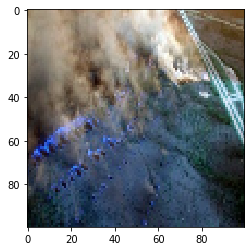

In [5]:
fire = np.load("fire.npy", allow_pickle=True)
plt.imshow(fire[0])

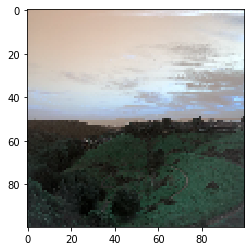

In [6]:
no_fire = np.load("no_fire.npy", allow_pickle=True)
plt.imshow(no_fire[0])

In [7]:
if REBUILD_DATA_ARRAY:
    if BALANCE_DATA:
        min_len = min(len(fire),len(no_fire))
        fire = fire[:min_len]
        no_fire = no_fire[:min_len]

    data = []
    for i in range(len(no_fire)): data.append([no_fire[i], 0])
    for i in range(len(fire)): data.append([fire[i], 1])    
    data = np.array(data)
    np.random.shuffle(data)
    np.save("data.npy", data)